In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Datasets/26-customer_data.csv")
df

,Annual_Income,Spending_Score
0,-5.772478,-4.818216
1,6.768246,-5.424570
2,5.796159,-6.239967
3,7.096022,-5.272612
4,-5.725561,-9.316889
...,...,...
1494,-4.937560,-10.019685
1495,-7.493203,-5.602109
1496,6.253449,-5.247933
1497,6.684590,-6.017490


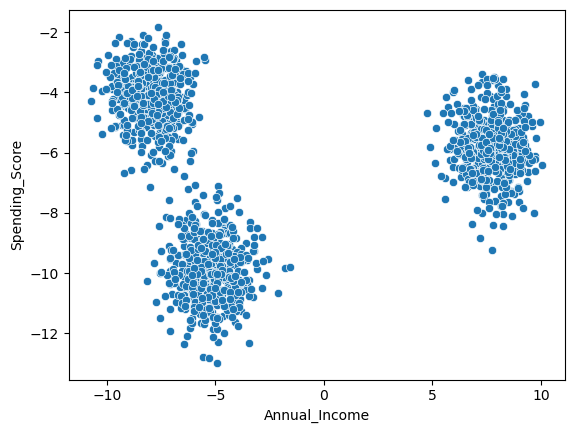

In [3]:
sns.scatterplot(x=df["Annual_Income"],y=df["Spending_Score"])
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test = train_test_split(df,test_size=0.2,random_state=15)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [8]:
from sklearn.cluster import KMeans

In [9]:
wcss = dict()
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train_sc)
    wcss[k] = kmeans.inertia_ # inertia verilerin merkeze olan uzaklıklarını verir (elbow method için)
wcss

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

{1: 196.9206878471016,
 2: 68.44836482219306,
 3: 11.697030239519934,
 4: 9.608419976549257,
 5: 8.101170167992725,
 6: 7.523793283988219,
 7: 5.541786237287659,
 8: 4.954692580834181,
 9: 4.577106829273836,
 10: 4.199272430009164}

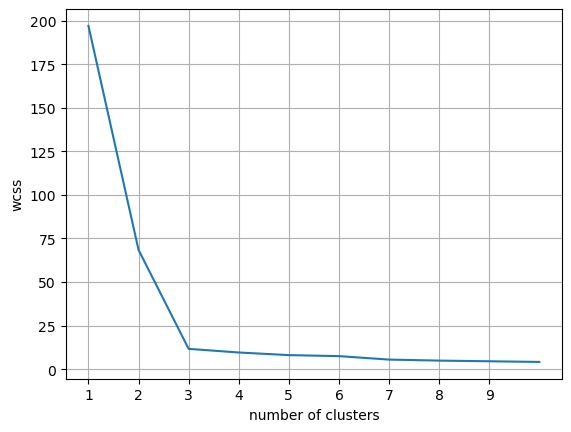

In [13]:
sns.lineplot(x=wcss.keys(),y=wcss.values())
plt.xticks(range(1,len(wcss)))
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.grid(True)
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3)

In [15]:
kmeans.fit(X_train_sc)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=3)

In [16]:
y_pred = kmeans.predict(X_test_sc)

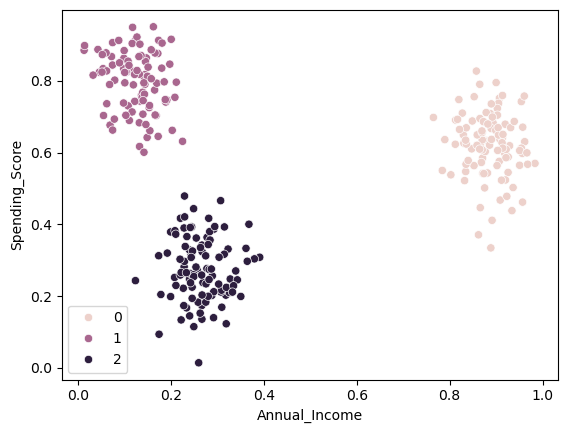

In [18]:
sns.scatterplot(data=pd.DataFrame(X_test_sc,columns=X_test.columns),x="Annual_Income",y="Spending_Score",hue=y_pred)
plt.show()

In [19]:
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable


In [21]:
from kneed import KneeLocator # bu kütüphane wcss deki kırılma noktasını otomatik hesaplar 

In [29]:
kl = KneeLocator(range(1,11),list(wcss.values()),curve="convex",direction="decreasing") # bu parametreler önemli yoksa sonuç vermez..

In [31]:
kl.elbow # kaç tane cluster olması gerektiğini direkt söylüyo

3

In [35]:
from sklearn.metrics import silhouette_score # gözetimsiz öğrenme için değerlendirme metirklerinden biri 

In [37]:
silhouette_dict = dict()
for k in range(2,11): # bu metrik en az 2 cluster olmadan çalışmaz.
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train_sc)
    score = silhouette_score(X_train_sc,kmeans.labels_)  # her verinin sınıflarını verir
    silhouette_dict[k] = score
silhouette_dict

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

{2: 0.6538372460771634,
 3: 0.7856941696336582,
 4: 0.6400208011797931,
 5: 0.49874974962047386,
 6: 0.4706247912724719,
 7: 0.36893406909680493,
 8: 0.3515168961173063,
 9: 0.3709666657512388,
 10: 0.34111218644273894}

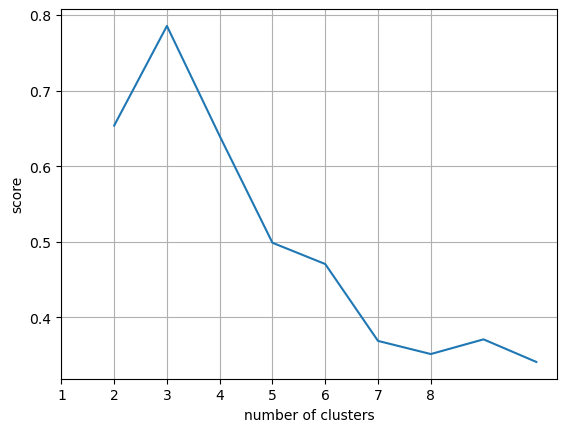

In [40]:
sns.lineplot(x=silhouette_dict.keys(),y=silhouette_dict.values())
plt.xticks(range(1,len(silhouette_dict)))
plt.xlabel("number of clusters")
plt.ylabel("score")
plt.grid(True)
plt.show() # bu metrik ile de aslında n_cluster için sağlama yapmış oluruz.